<a href="https://colab.research.google.com/github/AysegullYavuz/Flappy_Bird/blob/main/keypointdetection3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opencv-python opencv-python-headless


In [ ]:
from google.colab import files
import zipfile
import os

# Dosyaları yükleyin
uploaded = files.upload()

# Yüklenen zip dosyasını açın
for file_name in uploaded.keys():
    if file_name.endswith('.zip'):
        with zipfile.ZipFile(file_name, 'r') as zip_ref:
            zip_ref.extractall('/content')


TypeError: 'NoneType' object is not subscriptable

In [ ]:
import cv2
import os

# Açılan dosyaların bulunduğu dizin
extracted_folder = '/content/file'

# Nesne resmini yükle
obj_img_path = os.path.join(extracted_folder, 'cilek.jpg')
obj_img = cv2.imread(obj_img_path, cv2.IMREAD_GRAYSCALE)

# Referans resimleri yükle
ref_img_paths = [os.path.join(extracted_folder, 'cilek2.jpg'),
                 os.path.join(extracted_folder, 'cilek3.jpg'),
                 os.path.join(extracted_folder, 'cilek4.jpg'),
                 os.path.join(extracted_folder, 'cilek5.jpg'),
                 os.path.join(extracted_folder, 'cilek6.jpg'),
                 os.path.join(extracted_folder, 'cilek7.jpg'),]

ref_imgs = [cv2.imread(path, cv2.IMREAD_GRAYSCALE) for path in ref_img_paths]


In [ ]:
!pip install opencv-python-headless matplotlib


Saving file.zip to file (1).zip


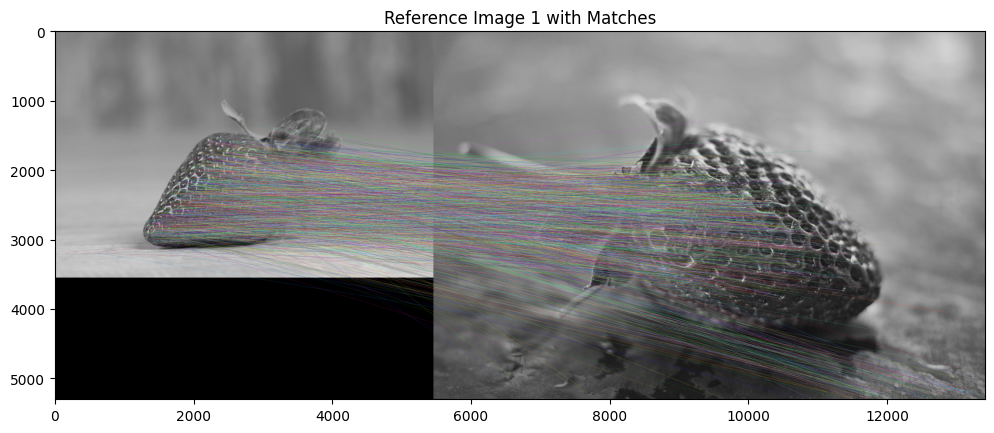

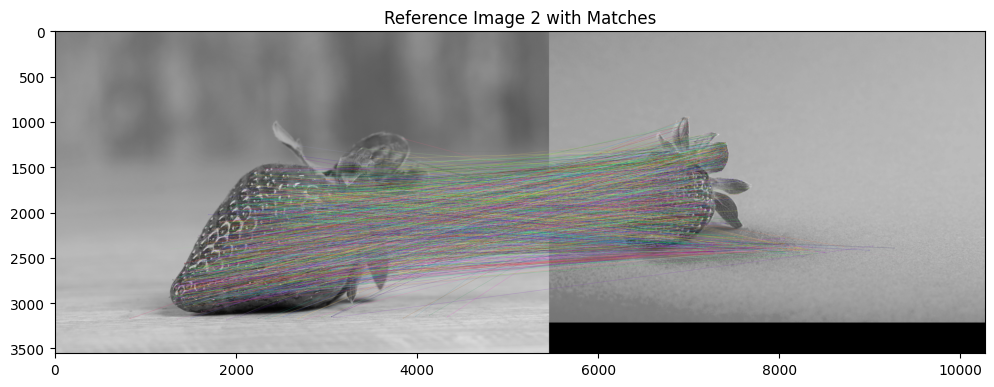

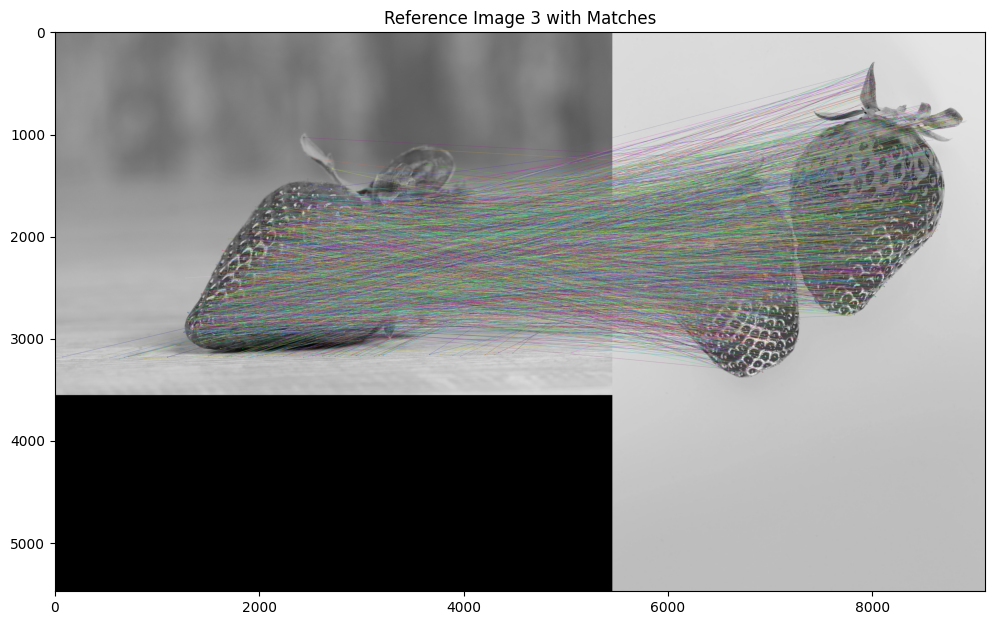

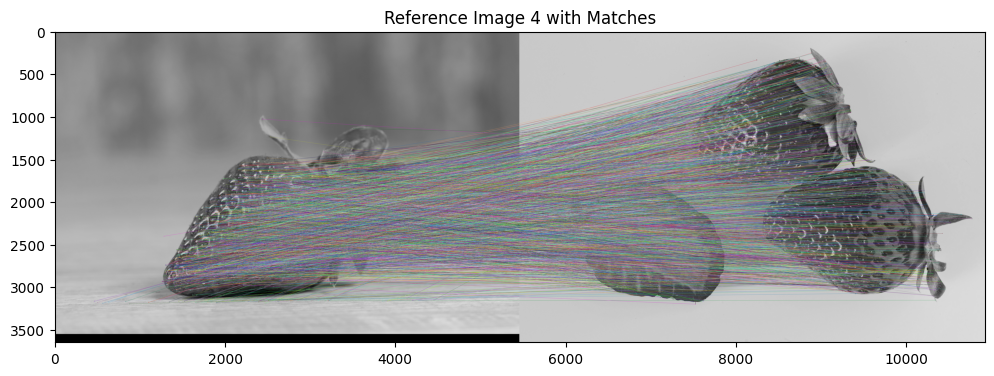

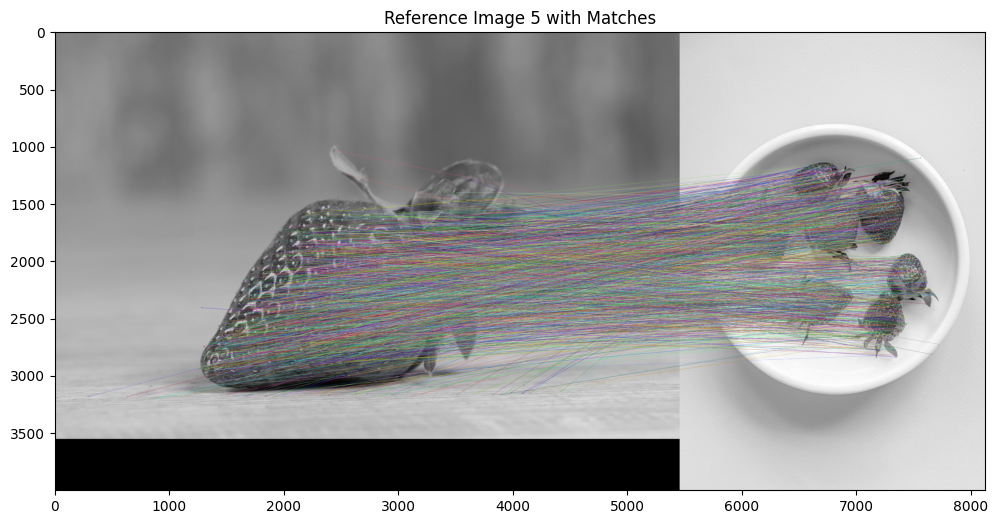

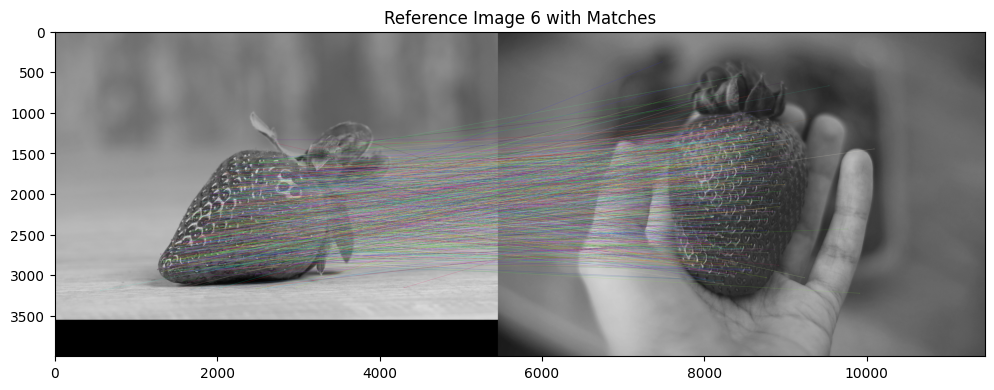

In [ ]:
import cv2
import numpy as np
import os
from google.colab import files
import zipfile
import matplotlib.pyplot as plt

# Gerekli kütüphaneleri yükleyin
!pip install opencv-python opencv-python-headless

# Dosyaları yükleyin
uploaded = files.upload()

# Yüklenen zip dosyasını açın
for file_name in uploaded.keys():
    if file_name.endswith('.zip'):
        with zipfile.ZipFile(file_name, 'r') as zip_ref:
            zip_ref.extractall('/content')

# Açılan dosyaların bulunduğu dizin
extracted_folder = '/content/file'  # Zip dosyanızın içindeki klasörün adını buraya yazın

# Nesne resmini yükle (grayscale olarak)
obj_img_path = os.path.join(extracted_folder, 'cilek.jpg')  # Nesne resminizin adı
obj_img = cv2.imread(obj_img_path, cv2.IMREAD_GRAYSCALE)

# Referans resimleri yükle (grayscale olarak)
ref_img_paths = [
    os.path.join(extracted_folder, 'cilek2.jpg'),  # Referans resimlerinizi burada listeleyin
    os.path.join(extracted_folder, 'cilek3.jpg'),
    os.path.join(extracted_folder, 'cilek4.jpg'),
    os.path.join(extracted_folder, 'cilek5.jpg'),
    os.path.join(extracted_folder, 'cilek6.jpg'),
    os.path.join(extracted_folder, 'cilek7.jpg'),
]
ref_imgs = [cv2.imread(path, cv2.IMREAD_GRAYSCALE) for path in ref_img_paths]

# SIFT Algoritmasını başlat
sift = cv2.SIFT_create()

# Nesne resminde keypoint ve deskriptörleri bulun
keypoints_obj, descriptors_obj = sift.detectAndCompute(obj_img, None)

# Her referans resmi için keypoint ve deskriptörleri bulun
keypoints_ref_list = []
descriptors_ref_list = []

for img in ref_imgs:
    keypoints, descriptors = sift.detectAndCompute(img, None)
    keypoints_ref_list.append(keypoints)
    descriptors_ref_list.append(descriptors)

# BFMatcher kullanarak eşleştirme
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

# Her referans resmi için eşleşmeleri bul ve sonuçları görselleştir
for i, (keypoints_ref, descriptors_ref) in enumerate(zip(keypoints_ref_list, descriptors_ref_list)):
    # Nesne ve referans resim arasında eşleşme yap
    matches = bf.match(descriptors_obj, descriptors_ref)
    matches = sorted(matches, key=lambda x: x.distance)  # Eşleşmeleri mesafeye göre sırala

    # Eşleşmeleri çiz
    img_matches = cv2.drawMatches(obj_img, keypoints_obj, ref_imgs[i], keypoints_ref, matches, None,
                                  flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    # Görüntüleyin
    plt.figure(figsize=(12, 8))
    plt.title(f'Reference Image {i+1} with Matches')
    plt.imshow(img_matches)
    plt.show()


Saving file2.zip to file2 (1).zip


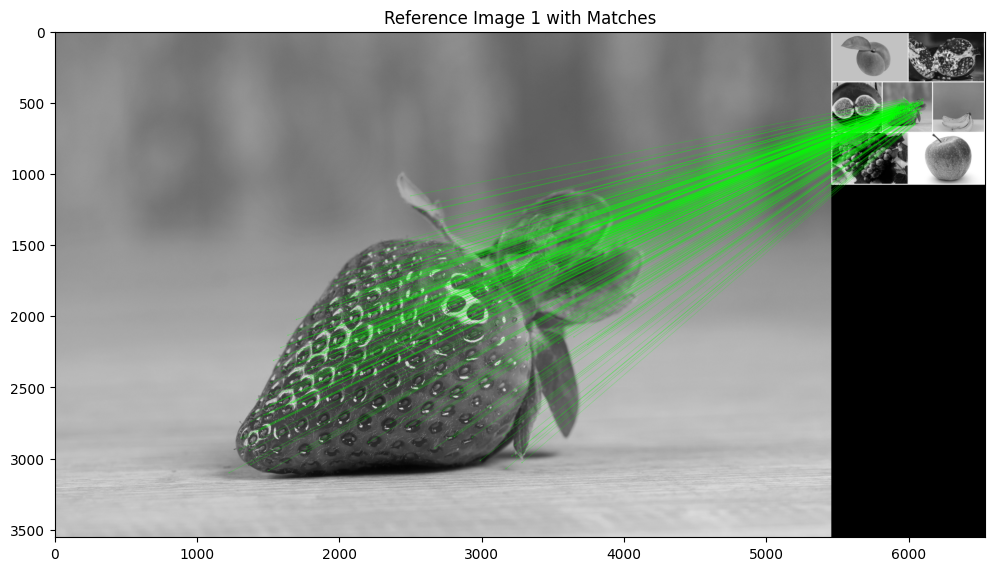

In [ ]:
import cv2
import numpy as np
import os
from google.colab import files
import zipfile
import matplotlib.pyplot as plt

# Gerekli kütüphaneleri yükleyin
!pip install opencv-python opencv-python-headless

# Dosyaları yükleyin
uploaded = files.upload()

# Yüklenen zip dosyasını açın
for file_name in uploaded.keys():
    if file_name.endswith('.zip'):
        with zipfile.ZipFile(file_name, 'r') as zip_ref:
            zip_ref.extractall('/content')

# Açılan dosyaların bulunduğu dizin
extracted_folder = '/content/file'  # Zip dosyanızın içindeki klasörün adını buraya yazın

# Nesne resmini yükle (grayscale olarak)
obj_img_path = os.path.join(extracted_folder, 'cilek.jpg')  # Nesne resminizin adı
obj_img = cv2.imread(obj_img_path, cv2.IMREAD_GRAYSCALE)

# Referans resimleri yükle (grayscale olarak)
ref_img_paths = [
    os.path.join(extracted_folder, 'other.jpg')
]
ref_imgs = [cv2.imread(path, cv2.IMREAD_GRAYSCALE) for path in ref_img_paths]

# SIFT Algoritmasını başlat
sift = cv2.SIFT_create()

# Nesne resminde keypoint ve deskriptörleri bulun
keypoints_obj, descriptors_obj = sift.detectAndCompute(obj_img, None)

# Her referans resmi için keypoint ve deskriptörleri bulun
keypoints_ref_list = []
descriptors_ref_list = []

for img in ref_imgs:
    keypoints, descriptors = sift.detectAndCompute(img, None)
    keypoints_ref_list.append(keypoints)
    descriptors_ref_list.append(descriptors)

# FLANN tabanlı matcher kullanarak eşleştirme
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)  # Eşleşme için yapılacak iterasyon sayısı

flann = cv2.FlannBasedMatcher(index_params, search_params)

# Eşik değeri ve eşleşme maskesi
MATCH_THRESHOLD = 0.7

# Her referans resmi için eşleşmeleri bul ve sonuçları görselleştir
for i, (keypoints_ref, descriptors_ref) in enumerate(zip(keypoints_ref_list, descriptors_ref_list)):
    matches = flann.knnMatch(descriptors_obj, descriptors_ref, k=2)

    # İyi eşleşmeleri sakla
    good_matches = []
    for m, n in matches:
        if m.distance < MATCH_THRESHOLD * n.distance:
            good_matches.append(m)

    # Eşleşme sayısına göre filtrele
    if len(good_matches) > 10:
        # RANSAC ile eşleşmeleri filtrele
        src_pts = np.float32([keypoints_obj[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
        dst_pts = np.float32([keypoints_ref[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

        M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
        matchesMask = mask.ravel().tolist()

        # Eşleşmeleri çiz
        draw_params = dict(matchColor=(0, 255, 0),  # Eşleşen noktaları yeşil çiz
                           singlePointColor=None,
                           matchesMask=matchesMask,  # Sadece iyi eşleşmeleri çiz
                           flags=2)

        img_matches = cv2.drawMatches(obj_img, keypoints_obj, ref_imgs[i], keypoints_ref, good_matches, None, **draw_params)

        # Görüntüleyin
        plt.figure(figsize=(12, 8))
        plt.title(f'Reference Image {i+1} with Matches')
        plt.imshow(img_matches)
        plt.show()
